In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from numpy import zeros, newaxis
from numpy import array
from numpy import reshape
import numpy as np
import csv
import matplotlib.pyplot as plt
import re


#import dataset

# legitime : http://www.impact-im.com/threads/liste-de-500000-e-mail-fran%C3%A7ais.740/
# spam : https://github.com/tsirolnik/spam-domains-list/blob/master/spamdomains.txt

vocab_size = 50000


with open('./dataset/fusion/train_data.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        train_data_tab = []
        for line in reader:
                train_data_tab.extend(line)

for i in range (len(train_data_tab)):
    if re.search(r'@.+', train_data_tab[i]):
        train_data_tab[i] = re.sub(r'@.+', '@laposte.fr', train_data_tab[i])
    elif re.search(r'\.\w{3,4}($|\?)', train_data_tab[i]):
        train_data_tab[i] = re.sub(r'\.\w{3,4}($|\?)', '@laposte.fr', train_data_tab[i])
    else:
        train_data_tab[i] += '@laposte.fr'


x_train = []
for i in train_data_tab:
    x_train.append(i)
#x_train = x_train[:5000]



##################################################################


with open('./dataset/fusion/train_labels.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        train_labels = []
        for line in reader:
                train_labels.extend(line)
                
train_labels = list(map(int, train_labels))
#train_labels = train_labels[:5000]



##################################################################


with open('./dataset/fusion/test_data.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        test_data_tab = []
        for line in reader:
                test_data_tab.extend(line)

for i in range (len(test_data_tab)):
    if re.search(r'@.+', test_data_tab[i]):
        test_data_tab[i] = re.sub(r'@.+', '@laposte.fr', test_data_tab[i])
    elif re.search(r'\.\w{3,4}($|\?)', test_data_tab[i]):
        test_data_tab[i] = re.sub(r'\.\w{3,4}($|\?)', '@laposte.fr', test_data_tab[i])
    else:
        test_data_tab[i] += '@laposte.fr'
        


x_test = []
for i in test_data_tab:
    x_test.append(i)
#x_test = x_test[:5000]

##################################################################



with open('./dataset/fusion/test_labels.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        test_labels = []
        for line in reader:
                test_labels.extend(line)

test_labels = list(map(int, test_labels))
#test_labels = test_labels[:5000]








In [12]:
from keras.preprocessing.text import Tokenizer

max_words = 1000
num_classes = max(train_labels) + 1


t = Tokenizer(num_words = max_words)

t.fit_on_texts(x_train)
x_train = t.texts_to_matrix(x_train, mode='count')
x_test = t.texts_to_matrix(x_test, mode='count')

y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

In [3]:
print('shape x_train : {}'.format(x_train.shape))
print('shape x_test : {}'.format(x_test.shape))
print('shape y_train : {}'.format(y_train.shape))
print('shape y_test : {}'.format(y_test.shape))

shape x_train : (50000, 1000)
shape x_test : (50000, 1000)
shape y_train : (50000, 2)
shape y_test : (50000, 2)


In [13]:
x_train = x_train.reshape(50000,1000,1)
x_test = x_test.reshape(50000,1000,1)

In [5]:
print('shape x_train : {}'.format(x_train.shape))
print('shape x_test : {}'.format(x_test.shape))
print('shape y_train : {}'.format(y_train.shape))
print('shape y_test : {}'.format(y_test.shape))

shape x_train : (50000, 1000, 1)
shape x_test : (50000, 1000, 1)
shape y_train : (50000, 2)
shape y_test : (50000, 2)


In [14]:
#build le model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, MaxPooling2D, Conv1D, Flatten, MaxPooling1D, Embedding, Reshape





# input: 2D tensor of integer indices of characters (eg. 1-57). 
# input tensor has shape (samples, maxlen)
model = Sequential()
model.add(Conv1D(32, kernel_size=(3),
                 activation='relu',
                 input_shape=(1000,1)))
model.add(Conv1D(64, (3), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])




history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    verbose=1)






Train on 50000 samples, validate on 50000 samples
Epoch 1/4
50000/50000 [==============================] - 84s 2ms/step - loss: 0.5929 - acc: 0.6046 - val_loss: 0.5561 - val_acc: 0.6288
Epoch 2/4
50000/50000 [==============================] - 83s 2ms/step - loss: 0.5372 - acc: 0.6285 - val_loss: 0.5376 - val_acc: 0.6322
Epoch 3/4
50000/50000 [==============================] - 86s 2ms/step - loss: 0.5291 - acc: 0.6318 - val_loss: 0.5354 - val_acc: 0.6328
Epoch 4/4
50000/50000 [==============================] - 88s 2ms/step - loss: 0.5251 - acc: 0.6299 - val_loss: 0.5351 - val_acc: 0.6333


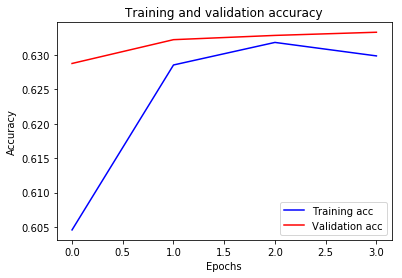

In [15]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']


plt.plot(acc_values, 'b', label='Training acc')
plt.plot( val_acc_values, 'b',color='red', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:

##################################
##                              ##
##            evaluate          ##
##                              ##
##################################
# Evaluate the model

#results = model.evaluate(test_data, test_labels)
#print(results)



evaluate_data = ['nl.rating-slimming@laposte.fr']
evaluate_data = t.texts_to_matrix(evaluate_data, mode='count')
evaluate_data = evaluate_data.reshape(1,1000,1)
predicted_classes = model.predict_classes(evaluate_data)
print(predicted_classes)

[1]
